In [1]:
import pandas as pd

DATA_FOLDER = './data/'

In [128]:
# Load Data and Clean
Data_raw = pd.read_csv(DATA_FOLDER + 'en.openfoodfacts.org.products.csv', delimiter = '\t', low_memory = False)

Data_raw.set_index('product_name', inplace = True)

Data_raw.reset_index(inplace = True)

Data_raw.set_index('code', inplace = True)

#Drop all the row and column with all NaN
Data_raw.dropna(axis = 0, how = 'all', inplace = True)
Data_raw.dropna(axis = 1, how = 'all', inplace = True)
Data_raw.drop_duplicates(inplace = True)

In [129]:
# Collect DataBase with only the food components
def Search2list(list_, string_):
    list_return = []
    for element in list_:
        if string_ in element:
            list_return.append(element)
    return list_return
column_food = Search2list(list(Data_raw.columns), '100g')
Food_components = Data_raw[column_food].copy()
Food_components.dropna(axis = 0, how = 'all', inplace = True)
Food_components.dropna(axis = 1, how = 'all', inplace = True)

In [134]:
#Collect DataBase with already Nutriscore
Nutri_Score_Data = Data_raw[['nutrition_grade_fr']].copy().dropna()
len(Nutri_Score_Data) * 100/len(Food_components)

23.205419678448724

In [138]:
Food_compon_Nutri = Nutri_Score_Data.join(Food_components)
Food_compon_Nutri.dropna(axis = 1, how = 'all', inplace = True)

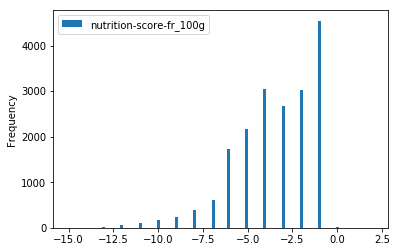

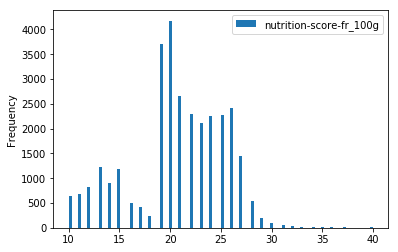

In [158]:
Food_compon_Nutri.loc[Food_compon_Nutri.nutrition_grade_fr == 'a', ['nutrition-score-fr_100g']].plot.hist(bins = 100)
Food_compon_Nutri.loc[Food_compon_Nutri.nutrition_grade_fr == 'e', ['nutrition-score-fr_100g']].plot.hist(bins = 100)

In [135]:
len(Nutri_Score_Data)

136569

In [131]:
len(Data_raw)

681575

In [132]:
len(Food_components)

588522

In [124]:
len(Nutri_Score_Data)/len(Data_raw)

0.20036766324042476

In [92]:
Boissons = Data_raw.categories.str.contains('Boissons', case = False)
Boissons.dropna(inplace = True)
len(Boissons[Boissons])

21058

In [84]:
Boissons_1 = Data_raw.categories_tags.str.contains('beverages', case = False)
Boissons_1.dropna(inplace = True)
len(Boissons_1[Boissons_1])


69907

In [77]:
Boissons_2 = Data_raw.categories_en.str.contains('Beverages', case = False)
Boissons_2.dropna(inplace = True)
len(Boissons_2[Boissons_2])

69907